In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab1.ipynb")

# Scatter charts

## The Gapminder bubble chart

The "bubble chart" have become quite famous from their appearance in the Gapminder talks,
and are widely used in other areas as well.
Let's start by recreating a simple version of this chart ourselves!

There will be some data wrangling involved in this lab,
and since 320 is primarily about visualization and this is the first lab,
I will give you some hints for most data wrangling parts of this lab.
Often I will link documentation or StackOverflow,
so that you get practice finding information on these sources,
and sometimes you will need to search them yourself if I haven't included a link.

To make this more interesting,
I have compiled a more recent version of the Gapminder dataset,
which contains values up until 2018 for most of the features.
We will not use all the columns in the data set,
but here is a description of what they contain
that you can refer back to throughout the lab.

| Column                | Description                                                                                  |
|-----------------------|----------------------------------------------------------------------------------------------|
| country               | Country name                                                                                 |
| year                  | Year of observation                                                                          |
| population            | Population in the country at each year                                                       |
| region                | Continent the country belongs to                                                             |
| sub_region            | Sub-region the country belongs to                                                            |
| income_group          | Income group [as specified by the world bank in 2018]                                                |
| life_expectancy       | The mean number of years a newborn would <br>live if mortality patterns remained constant    |
| income                | GDP per capita (in USD) <em>adjusted <br>for differences in purchasing power</em>            |
| children_per_woman    | Average number of children born per woman                                                    |
| child_mortality       | Deaths of children under 5 years <break>of age per 1000 live births                          |
| pop_density           | Average number of people per km<sup>2</sup>                                                  |
| co2_per_capita        | CO2 emissions from fossil fuels (tonnes per capita)                                          |
| years_in_school_men   | Mean number of years in primary, secondary,<br>and tertiary school for 25-36 years old men   |
| years_in_school_women | Mean number of years in primary, secondary,<br>and tertiary school for 25-36 years old women |

[as specified by the world bank in 2018]: https://datahelpdesk.worldbank.org/knowledgebase/articles/378833-how-are-the-income-group-thresholds-determined

In [2]:
# Run this cell to ensure that altair plots show up on gradescope
# We will talk more about what these lines do later in the course
import altair as alt

# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable('data_server')
# Include an image for each plot since Gradescope only supports displaying plots as images
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

### Question 1

<div class="alert alert-info" style="color:black">

We have uploaded the <a href=https://raw.githubusercontent.com/UofTCoders/workshops-dc-py/master/data/processed/world-data-gapminder.csv> 2018 Gapminder data at this URL.</a> Use <code>read_csv</code> from <code>pandas</code> to load the data directly from the URL and assign it a suitable variable name. Set the <code>parse_dates</code> parameter to <code>['year']</code> to ensure that Altair recognizes this columns as time data.

After loading in the data,
identify what data type each column contains
and how many non-NA values there are in each column.
</div>

_Points:_ 2

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/UofTCoders/workshops-dc-py/master/data/processed/world-data-gapminder.csv"
# Read in the data using pandas
gm = pd.read_csv(url, parse_dates = ['year'])

# Identify a single method in pandas to print out the column names, their data types, and count of non-NA values
gm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38982 entries, 0 to 38981
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   country                38982 non-null  object        
 1   year                   38982 non-null  datetime64[ns]
 2   population             38982 non-null  int64         
 3   region                 38982 non-null  object        
 4   sub_region             38982 non-null  object        
 5   income_group           38982 non-null  object        
 6   life_expectancy        38982 non-null  float64       
 7   income                 38982 non-null  int64         
 8   children_per_woman     38982 non-null  float64       
 9   child_mortality        38980 non-null  float64       
 10  pop_density            12282 non-null  float64       
 11  co2_per_capita         16285 non-null  float64       
 12  years_in_school_men    8188 non-null   float64       
 13  y

In [4]:
grader.check("q1")

q1 results: All test cases passed!
q1 - 2 message: All your variables have the expected name and type

### Question 2

<div class="alert alert-info" style="color:black">

Filter the dataframe to only keep observations from a single year, 1982 and assigned this to a new variable name `gm_1982`. Dates can be matched as strings when filtering.

</div>

_Points:_ 1

In [5]:
gm_1982 = gm[gm["year"].dt.year==1982]

# Print the dataframe
gm_1982

,country,year,population,region,sub_region,income_group,life_expectancy,income,children_per_woman,child_mortality,pop_density,co2_per_capita,years_in_school_men,years_in_school_women
182,Afghanistan,1982-01-01,12700000,Asia,Southern Asia,Low,43.8,1410,7.45,232.0,19.50,0.165,1.85,0.32
401,Albania,1982-01-01,2790000,Europe,Southern Europe,Upper middle,72.5,4410,3.45,66.8,102.00,2.620,7.59,7.04
620,Algeria,1982-01-01,20600000,Africa,Northern Africa,Upper middle,64.4,10600,6.43,117.0,8.64,1.910,3.72,3.36
839,Angola,1982-01-01,9580000,Africa,Sub-Saharan Africa,Lower middle,50.0,4110,7.44,231.0,7.69,0.485,3.67,2.06
1058,Antigua and Barbuda,1982-01-01,72400,Americas,Latin America and the Caribbean,High,71.5,8470,2.10,39.7,165.00,4.050,8.69,9.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38069,Venezuela,1982-01-01,16200000,Americas,Latin America and the Caribbean,Upper middle,70.6,16600,4.01,40.6,18.40,5.770,6.28,6.20
38288,Vietnam,1982-01-01,56900000,Asia,South-eastern Asia,Lower middle,65.3,1180,4.69,64.9,184.00,0.323,5.77,4.95
38507,Yemen,1982-01-01,8760000,Asia,Western Asia,Low,54.1,3430,8.83,183.0,16.60,0.679,3.17,0.44
38726,Zambia,1982-01-01,6310000,Africa,Sub-Saharan Africa,Lower middle,57.5,2770,6.95,158.0,8.48,0.558,5.22,3.46


In [6]:
grader.check("q2")

q2 results: All test cases passed!
q2 - 1 message: All your variables have the expected name and type

<!-- BEGIN QUESTION -->

### Question 3

<div class="alert alert-info" style="color:black">

<ol type="1">
<li>Using the <code>gm_1982</code> dataframe,
create a scatter plot with <code>years_in_school_men</code> on the x-axis.
Since <code>years_in_school_men</code> holds numerical values,
Altair will assign it as a "Quantitative" data types by default. NOTE: Do not specify the 'y' channel</li>
<li>Explicitly change the data type in the scatter plot to "Nominal"
and observe what happens.</li>
</ol>

</div>

_Points:_ 3

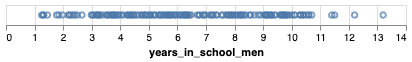

In [7]:
scatter_quantitative = alt.Chart(gm_1982).mark_point().encode(
    x = "years_in_school_men:Q"
)

# Show the plot
scatter_quantitative

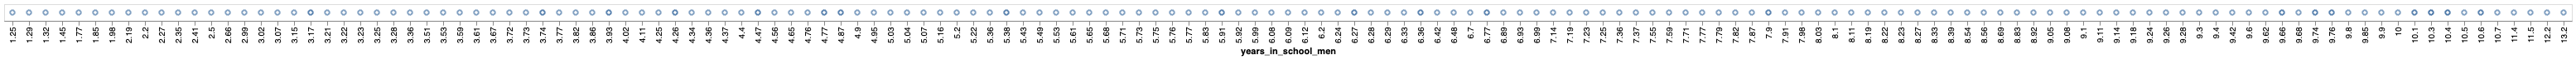

In [8]:
scatter_nominal = alt.Chart(gm_1982).mark_point().encode(
    x = "years_in_school_men:N"
)

# Show the plot
scatter_nominal

In [9]:
grader.check("q3")

q3 results: All test cases passed!
q3 - 1 message: All your variables have the expected name and type

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 4

<div class="alert alert-info" style="color:black">


<ol type="1">
<li>Using the <code>gm_1982</code> dataframe,
create a scatter plot with <code>years_in_school_men</code> on the x-axis
and <code>life_expectancy</code> on the y-axis.</li>
<li>What do you observe about the relationship between these two variables? Indicate your answer as a string in the coding cell below. </li>
    <ol type="A">
    <li>There seems to be a negative relationship between the two variables</li>
    <li>There seems to be no relationship between the two variables</li>
    <li>There seems to be a positive relationship between the two variables</li>
    </ol>
</ol>
</div>

_Points:_ 3

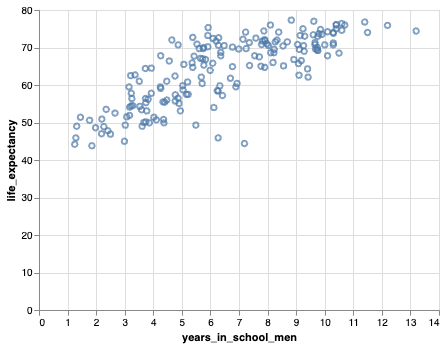

In [10]:
scatter_lifexp_school = alt.Chart(gm_1982).mark_point().encode(
    x = "years_in_school_men",
    y = "life_expectancy"
)

# Show the plot
scatter_lifexp_school

In [11]:
# The correct letter option from bullet two above as a string ('A', 'B', or 'C')
relationship = 'C'

In [12]:
grader.check("q4")

q4 results: All test cases passed!
q4 - 1 message: All your variables have the expected name and type

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 5

<div class="alert alert-info" style="color:black">

To answer the last lab question, first watch this 20 min video of Hans Rosling, a public health professor at Karolinska Institute who founded Gapminder together with his son and his son's wife. Although the video is almost 15 years old, it is a formidable demonstration on how to present data in a way that engages your audience while conveying a strong, important message. (The original clip has over 3 million views, but I linked you one of better video quality).

[Video link](https://www.youtube.com/watch?v=usdJgEwMinM)

Briefly describe (<=90 words) what you think is the most important message conveyed in the video and which data visualization you think was the most effective in getting this message across to the viewers.

</div>

Data visualization is very important as it allows us to visualize trends in various aspects of the world. There are so many useful design tools for data but our world do not allow us to copy the data up to a searchable format. We want to see all the information!!

I like the visualization of the world income distribution. He replaced a coin with a pie chart and used the animation of lightning to split the coin, with each fragment representing the percentage of each part of the pie chart.